In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [3]:
df = pd.read_csv("city_day.csv")

In [4]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df.shape

(29531, 16)

In [7]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

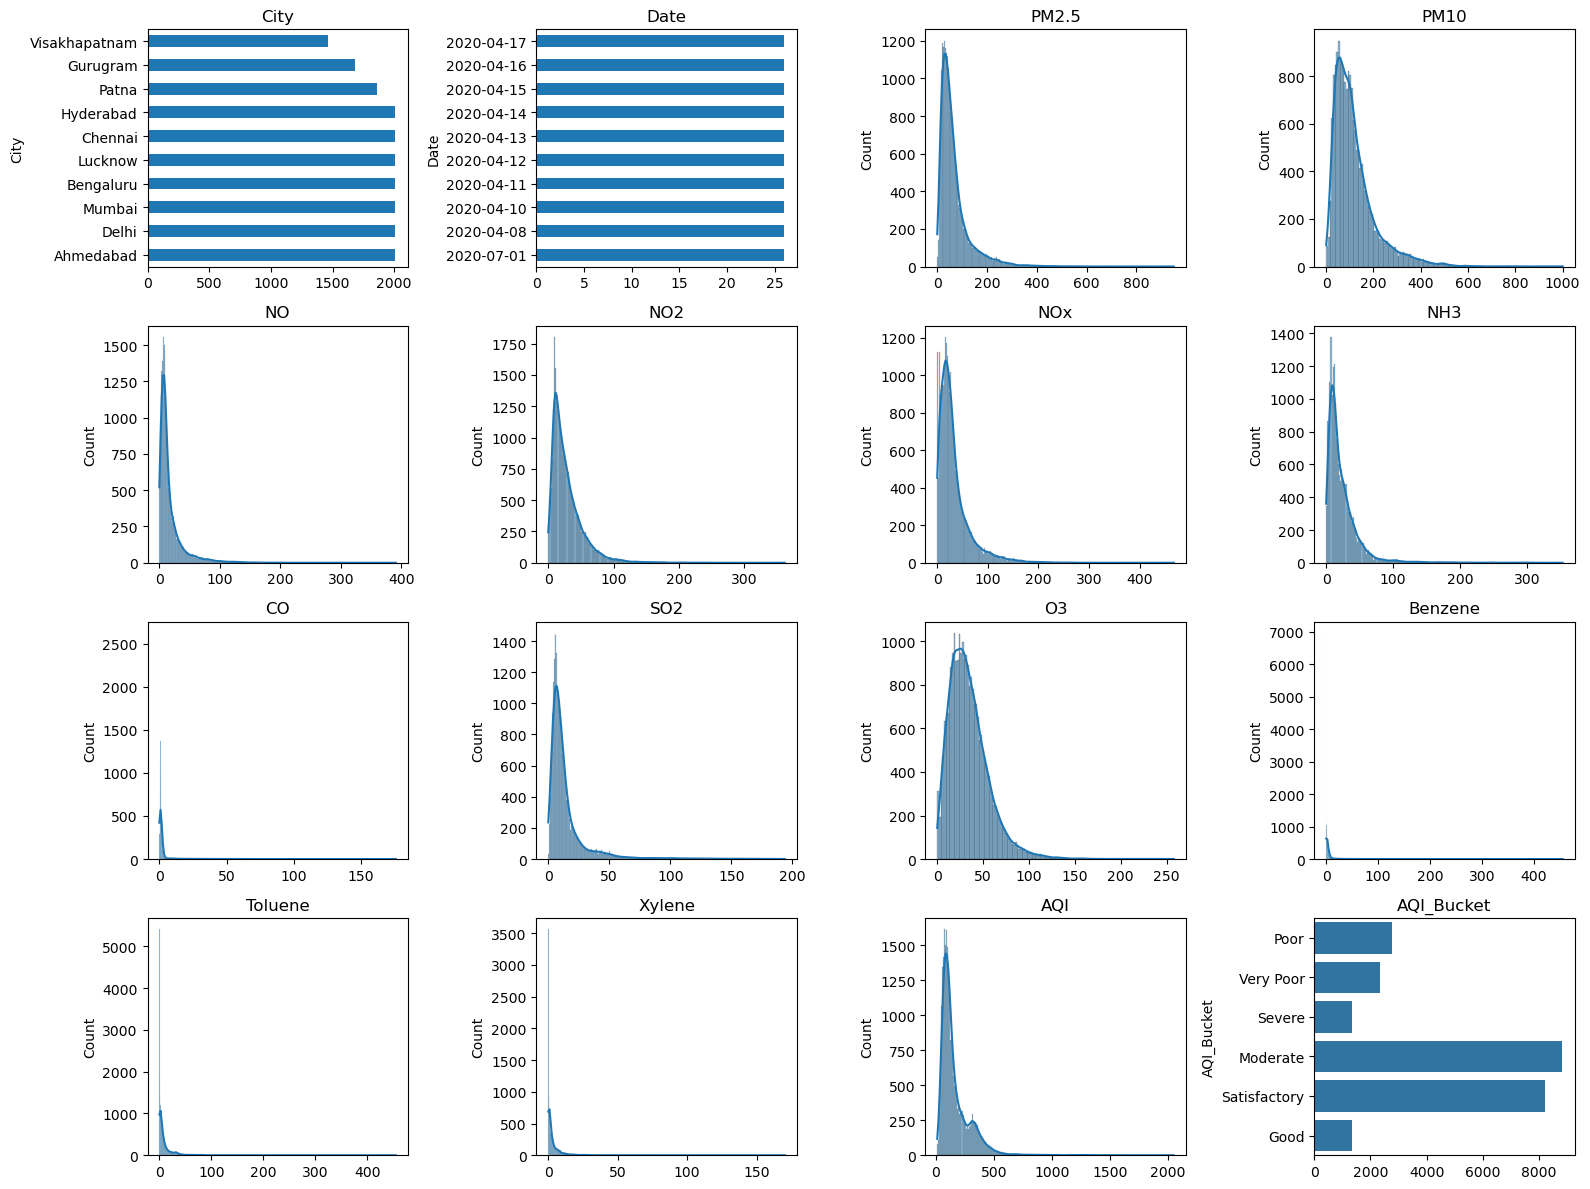

In [8]:

def plot_all_columns(df):
   
    num_cols = len(df.columns)
    
  
    grid_size = int(np.ceil(np.sqrt(num_cols)))
    
    
    fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(grid_size*4, grid_size*3))
    axes = axes.flatten()  
    
   
    for i, col in enumerate(df.columns):
        if i < len(axes): 
            ax = axes[i]
            
            
            if pd.api.types.is_numeric_dtype(df[col]):
                # For numeric columns
                if df[col].nunique() > 10:  
                    sns.histplot(df[col], kde=True, ax=ax)
                else:  # Discrete numeric data
                    sns.countplot(y=df[col], ax=ax)
            else:
            
                if df[col].nunique() <= 10:  
                    sns.countplot(y=df[col], ax=ax)
                else:  # Many categories
                    df[col].value_counts().head(10).plot(kind='barh', ax=ax)
                    ax.set_title(f"Top 10 values: {col}")
            
            ax.set_title(col)
            ax.set_xlabel('')

    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()


plot_all_columns(df)

In [9]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [10]:
df["AQI_Bucket"].value_counts()

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

In [11]:
df = df.drop({"City" , "Date"} , axis =1)

In [12]:
col = df.columns.drop("AQI_Bucket")
col

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [13]:
for column in col:
    df[column].fillna(df[column].mean() , inplace = True)

/var/folders/br/3n7cw9fs06z3gbzs6yw2x1xr0000gn/T/ipykernel_19858/2481321781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean() , inplace = True)


In [14]:
df.isnull().sum()

PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [15]:
df.groupby('AQI_Bucket')['AQI'].agg(['min', 'max', 'mean']).sort_values(by='mean')

,min,max,mean
AQI_Bucket,,,
Good,13.0,50.0,40.268456
Satisfactory,51.0,100.0,76.765686
Moderate,101.0,200.0,136.671877
Poor,201.0,300.0,245.663430
Very Poor,301.0,400.0,343.004279
Severe,401.0,2049.0,567.886398


In [16]:
df = df.drop("AQI_Bucket" , axis = 1)

In [17]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581


In [18]:
X = df.drop("AQI"  , axis =1)
Y = df["AQI"]

In [19]:
X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000
29527,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000
29528,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000
29529,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000


In [20]:
Y

0        166.463581
1        166.463581
2        166.463581
3        166.463581
4        166.463581
            ...    
29526     41.000000
29527     70.000000
29528     68.000000
29529     54.000000
29530     50.000000
Name: AQI, Length: 29531, dtype: float64

In [21]:
model = LinearRegression()

In [22]:
X_train,X_test  , Y_train , Y_test = train_test_split(X ,Y , test_size=0.2 , random_state=2)

In [23]:
model.fit(X_train , Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
model.score(X_train , Y_train)

0.793642756088143

In [25]:
model.score(X_test ,Y_test)

0.794372921927727

In [26]:
pred = model.predict(X_test)

In [27]:
r2 = r2_score(Y_test, pred)
print("R² Score:", r2)


R² Score: 0.794372921927727


In [28]:
def AQI_bucket(AQI):
    if AQI >=13.0	and AQI<=50.0:
        print("AIR Quality is GOOD")
    elif AQI>=50.1	and AQI<=100.0:
        print("AIR Quality is Satisfactory")
    elif AQI>=100.1	and AQI<=200.0:
        print("AIR Quality is Moderate")
    elif AQI>=200.1	and AQI<=300.0:
        print("AIR Quality is Poor")
    elif AQI>=300.1	and AQI<=400.0:
        print("AIR Quality is Poor")
    else:
        print("AIR Quality is Severe")
    

In [29]:
input = np.asarray([104.81,	192.2,	9.59,	63.48,	41.57,	21.06,	0.23,	17.01,	63.87,	0.38,	4.1,	0.36])
input = input.reshape(1,-1)

In [30]:
AQI_bucket(model.predict(input))

AIR Quality is Poor


/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
pickle.dump(model ,open("aqi_model.sav" ,'wb'))


/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([226.72791062])